# ORIE 4580/5580/5581 Assignment 5

#### Student: K. Bond (klb298)

### Github link: [Kimberly Bond's Github]
https://github.com/kimbond0071/ORIE5580Homeworks


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

Over 5 weeks, a total of **28.8 birds per week** (tagged and untagged) were observed. On average, **6 tagged birds** were seen per week. We want to estimate the total bird population using the **method of moments (MOM)**, assuming inter-arrival times between bird sightings are i.i.d. and exponentially distributed with rate parameter $\lambda$.

---

### Step 1: Relating observation rates to inter-arrival times

If 28.8 birds are observed per week, then on average:

$$
1 \text{ bird is observed every } \frac{1}{28.8} = 0.03472 \text{ weeks}.
$$

Thus, the mean inter-arrival time for all birds is $0.03472$ weeks per bird.

For tagged birds:

$$
6 \text{ tagged birds per week} \Rightarrow 1 \text{ tagged bird every } \frac{1}{6} = 0.1667 \text{ weeks}.
$$

---

### Step 2: Modeling inter-arrival times as exponential

Let $Y$ denote the inter-arrival time for all birds, and $T$ denote the inter-arrival time for tagged birds.

$$
Y \sim \text{Exponential}(\lambda_Y), \quad E[Y] = \frac{1}{\lambda_Y}
$$

$$
T \sim \text{Exponential}(\lambda_T), \quad E[T] = \frac{1}{\lambda_T}
$$

By the method of moments, we estimate

$$
\hat{\lambda}_Y = 28.8 \text{ birds/week}, \qquad \hat{\lambda}_T = 6 \text{ tagged birds/week.}
$$

---

### Step 3: Using the proportion of tagged birds observed

A total of 10 birds were tagged. Of these, 6 were observed again — meaning **60% of tagged birds were seen**.

If 28.8 birds per week correspond to 60% of the entire population, then the total population $Z$ satisfies

$$
0.6Z = 28.8
$$

$$
Z = \frac{28.8}{0.6} = 48.
$$

---

### Step 4: Conclusion

Assuming each bird observed represents a unique individual (no repeat sightings), the MOM estimate for the total bird population is

$$
\boxed{Z \approx 48 \text{ birds in total.}}
$$


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



# Question 1(b): MLE for Hawk Population (15 points)

During one week, **20 unique hawks** visited the feeding station, including **4 tagged hawks**. We want to estimate the total hawk population in Ithaca using the **maximum likelihood estimator (MLE)** under the assumption that inter-arrival times are exponentially distributed.

---

### Step 1: Establishing the likelihood model

For an exponential distribution with rate parameter $\lambda$, the MLE is given by

$$
\hat{\lambda}_{\text{MLE}} = \frac{1}{\bar{x}} = \frac{n}{\sum_{i=1}^{n} x_i}.
$$

---

### Step 2: Estimating rates for total and tagged birds

For all hawks:

$$
\hat{\lambda}_{\text{MLE}} = 20\ \text{birds/week.}
$$

For tagged hawks:

$$
\hat{\lambda}_{\text{tagged, MLE}} = 4\ \text{birds/week.}
$$

---

### Step 3: Using the observed proportion of tagged hawks

Out of the total 10 tagged hawks, 4 were observed again this week, meaning

$$
\frac{4}{10} = 0.4 = 40\% \text{ of tagged hawks were seen.}
$$

If 20 hawks per week correspond to 40% of the total population, then the total population $Z$ satisfies

$$
0.4Z = 20 \quad \Rightarrow \quad Z = 50.
$$

---

### Step 4: Conclusion

Based on the MLE and uniquely identified hawks, the estimated total hawk population is

$$
\boxed{Z \approx 50\ \text{hawks.}}
$$


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>


Let $N$ denote the **true daily demand** for soup at the Temple of Zeus. We assume

$$
N \sim \text{Geometric}(p), \qquad P(N = k) = (1 - p)^k p, \quad k \ge 0.
$$

---

### Step 1: Defining variables

Let  

- $D$ = number of days of data = 100  
- $S$ = servings of soup made per day = 40  
- $Y$ = observed daily sales of soup  

Since the kitchen only prepares up to 40 servings, the observed number of soups sold is **censored** at 40:

$$
Y_i =
\begin{cases}
N_i, & N_i < 40, \\
40,  & N_i \ge 40.
\end{cases}
$$

Hence, when $Y_i = 40$, the true demand satisfies $N_i \ge 40$, and when $Y_i < 40$, $N_i = Y_i$.

---

### Step 2: Deriving the pmf of observed sales $Y$

We want the probability mass function (pmf) of $Y$ in terms of $p$.

For $0 \le y < 40$, we have the same as the geometric pmf:

$$
P(Y = y) = (1 - p)^y p, \quad 0 \le y < 40.
$$

For $y = 40$, the event occurs when the true demand $N \ge 40$:

$$
P(Y = 40) = P(N \ge 40) = 1 - \sum_{k=0}^{39} (1 - p)^k p.
$$

---

### Step 3: Simplifying the upper tail probability

Using the geometric series formula,

$$
\sum_{k=0}^{39} (1 - p)^k p = 1 - (1 - p)^{40},
$$

so

$$
P(Y = 40) = (1 - p)^{40}.
$$

---

### Step 4: Final pmf of observed sales

Combining the two cases, the pmf of $Y$ is

$$
f_Y(y) =
\begin{cases}
(1 - p)^y p, & 0 \le y < 40, \\
(1 - p)^{40}, & y = 40.
\end{cases}
$$


## Ans.


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [5]:
#First Draft written with Gemini
import pandas as pd
import numpy as np

# Load the data
sales_data = pd.read_csv('Soup_sales_data.csv')
sales = sales_data['Y'].values

# Define the threshold for censored data
censorship_threshold = 40

# Separate data into uncensored and censored
uncensored_sales = sales[sales < censorship_threshold]
censored_sales_count = np.sum(sales == censorship_threshold)

# Calculate the components for the MLE formula
n_lt_40 = len(uncensored_sales) # Number of observations where y_i < 40
S_lt_40 = np.sum(uncensored_sales) # Sum of y_i for observations where y_i < 40
n_eq_40 = censored_sales_count # Number of observations where y_i = 40 (censored)

# Calculate the MLE for p
p_mle = n_lt_40 / (n_lt_40 + S_lt_40 + censorship_threshold * n_eq_40)

print(f"Number of uncensored sales (y < 40): {n_lt_40}")
print(f"Sum of uncensored sales (S_lt_40): {S_lt_40}")
print(f"Number of censored sales (y = 40): {n_eq_40}")
print(f"Maximum Likelihood Estimator for p: {p_mle:.4f}")

Number of uncensored sales (y < 40): 66
Sum of uncensored sales (S_lt_40): 1037
Number of censored sales (y = 40): 34
Maximum Likelihood Estimator for p: 0.0268


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

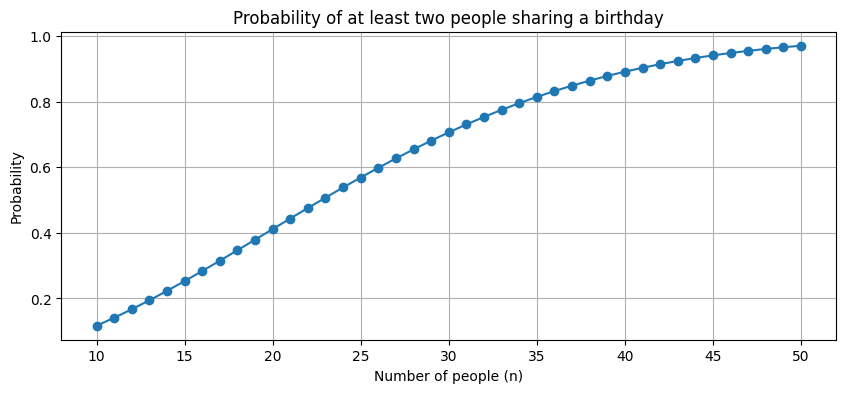

In [21]:
#First draft generate with Gemini
import numpy as np
import matplotlib.pyplot as plt
import math

def prob_no_shared_birthday(n, days_in_year=365):
    """
    Calculates the probability that no two people share a birthday
    in a group of 'n' people.
    """
    if n > days_in_year:
        return 0.0
    return math.prod([(days_in_year - i) / days_in_year for i in range(n)])

def prob_shared_birthday(n, days_in_year=365):
    """
    Calculates the probability that at least two people share a birthday
    in a group of 'n' people.
    """
    return 1.0 - prob_no_shared_birthday(n, days_in_year)

# Define the range of n values
n_values = np.arange(10, 51) # From 10 to 50 inclusive

# Calculate probabilities for each n
probabilities = [prob_shared_birthday(n) for n in n_values]

plt.figure(figsize=(10, 4))
plt.plot(n_values, probabilities, marker='o')
plt.title('Probability of at least two people sharing a birthday')
plt.xlabel('Number of people (n)')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

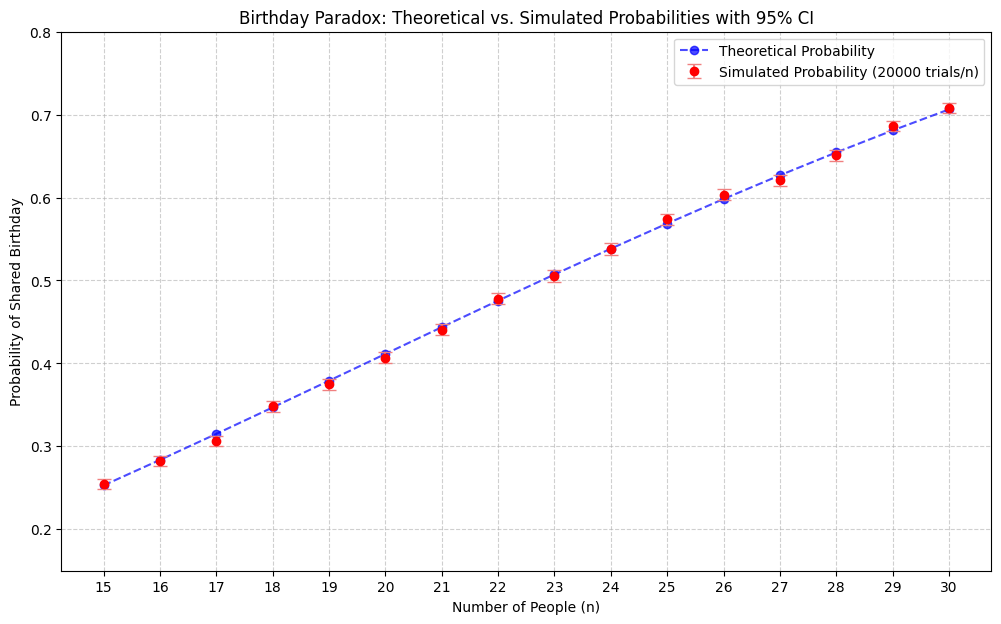

n | Theoretical Prob | Simulated Prob | 95% CI Lower | 95% CI Upper
------------------------------------------------------------------
15 |           0.2529 |         0.2550 |       0.2490 |       0.2611
16 |           0.2836 |         0.2823 |       0.2761 |       0.2885
17 |           0.3150 |         0.3065 |       0.3001 |       0.3128
18 |           0.3469 |         0.3483 |       0.3416 |       0.3549
19 |           0.3791 |         0.3749 |       0.3681 |       0.3816
20 |           0.4114 |         0.4069 |       0.4001 |       0.4138
21 |           0.4437 |         0.4406 |       0.4338 |       0.4475
22 |           0.4757 |         0.4782 |       0.4712 |       0.4851
23 |           0.5073 |         0.5057 |       0.4988 |       0.5126
24 |           0.5383 |         0.5380 |       0.5310 |       0.5449
25 |           0.5687 |         0.5737 |       0.5669 |       0.5806
26 |           0.5982 |         0.6037 |       0.5969 |       0.6104
27 |           0.6269 |         0.621

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

# --- Simulation function ---
def simulate_birthday_paradox(n_people, days_in_year=365):
    """
    Simulates the birthday paradox for a given number of people.
    Returns True if at least two people share a birthday, False otherwise.
    """
    birthdays = np.random.randint(1, days_in_year + 1, n_people)
    return len(birthdays) != len(set(birthdays))

# --- Parameters for simulation ---
n_values_sim = np.arange(15, 31)  # n from 15 to 30 inclusive
n_trials = 20000  # Number of simulations for each n
days_in_year = 365

# --- Store results ---
simulated_probabilities = []
lower_bounds = []
upper_bounds = []
theoretical_probabilities = []

# --- Run simulations and calculate CIs ---
for n in n_values_sim:
    # Simulate
    shared_birthday_count = 0
    for _ in range(n_trials):
        if simulate_birthday_paradox(n, days_in_year):
            shared_birthday_count += 1

    p_hat = shared_birthday_count / n_trials
    simulated_probabilities.append(p_hat)

    # Calculate 95% Confidence Interval (Normal Approximation)
    # For a binomial proportion, standard error is sqrt(p_hat * (1 - p_hat) / n_trials)
    # Z-score for 95% CI is approximately 1.96
    if n_trials > 0: # Avoid division by zero
        standard_error = np.sqrt(p_hat * (1 - p_hat) / n_trials)
        margin_of_error = 1.96 * standard_error # 1.96 for 95% CI

        # Ensure CI bounds are within [0, 1]
        lower_bound = max(0, p_hat - margin_of_error)
        upper_bound = min(1, p_hat + margin_of_error)
    else: # If no trials, CI is undefined or trivial
        lower_bound = p_hat
        upper_bound = p_hat

    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    # Calculate theoretical probability
    theoretical_probabilities.append(prob_shared_birthday(n, days_in_year))

# Convert lists to numpy arrays for easier plotting
simulated_probabilities = np.array(simulated_probabilities)
lower_bounds = np.array(lower_bounds)
upper_bounds = np.array(upper_bounds)
theoretical_probabilities = np.array(theoretical_probabilities)

# Calculate error bars for plotting
yerr = [simulated_probabilities - lower_bounds, upper_bounds - simulated_probabilities]

# --- Plotting ---
plt.figure(figsize=(12, 7))

# Plot theoretical probabilities
plt.plot(n_values_sim, theoretical_probabilities, color='blue', linestyle='--', marker='o',
         label='Theoretical Probability', alpha=0.7)

# Plot simulated probabilities with error bars
plt.errorbar(n_values_sim, simulated_probabilities, yerr=yerr, fmt='o', color='red',
             ecolor='lightcoral', capsize=5, label=f'Simulated Probability ({n_trials} trials/n)')

plt.title('Birthday Paradox: Theoretical vs. Simulated Probabilities with 95% CI')
plt.xlabel('Number of People (n)')
plt.ylabel('Probability of Shared Birthday')
plt.xticks(n_values_sim) # Ensure all n values are shown on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0.15, 0.8) # Extend y-axis slightly for better visualization
plt.show()

# Print some results for verification
print("n | Theoretical Prob | Simulated Prob | 95% CI Lower | 95% CI Upper")
print("------------------------------------------------------------------")
for i in range(len(n_values_sim)):
    print(f"{n_values_sim[i]:2} | {theoretical_probabilities[i]:16.4f} | {simulated_probabilities[i]:14.4f} | {lower_bounds[i]:12.4f} | {upper_bounds[i]:12.4f}")



<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

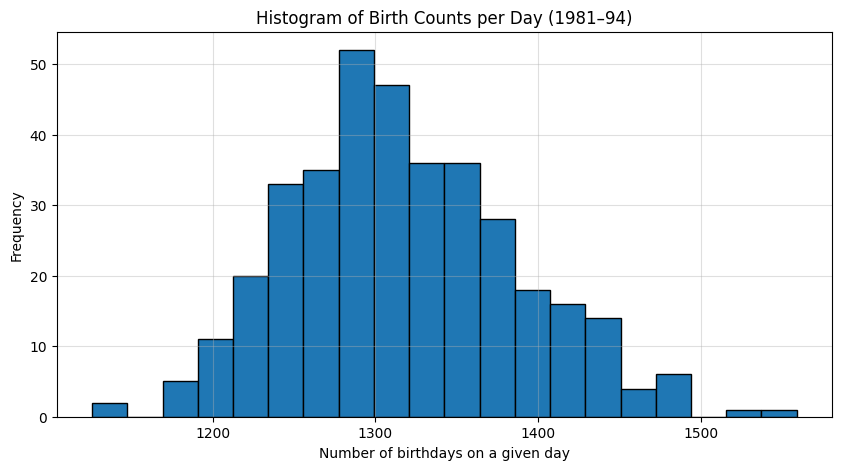

In [63]:
## ChatGPT aided in uploading data and writing well-labeled code for the plots
## Plot histogram
import pandas as pd

bday = pd.read_csv("bdaydata.txt", sep=" ", header=int(0), names=["date", "count"])
bday.head()
len(bday)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(bday["count"], bins=20, edgecolor='black')
plt.title("Histogram of Birth Counts per Day (1981–94)")
plt.xlabel("Number of birthdays on a given day")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.4)
plt.show()


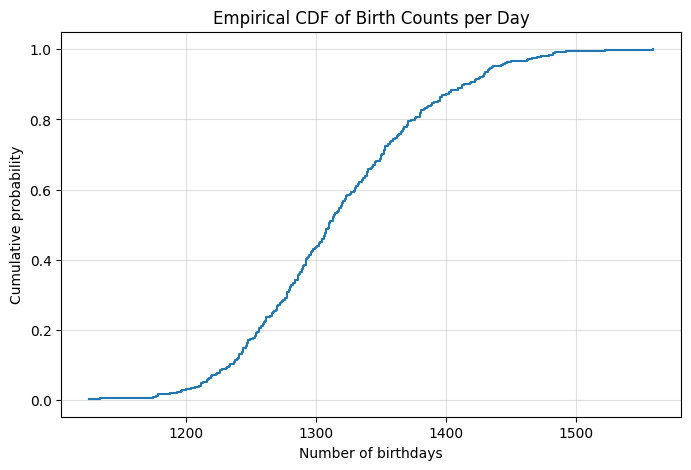

In [64]:
## Empirical CDF
import numpy as np

sorted_counts = np.sort(bday["count"])
ecdf = np.arange(1, len(sorted_counts)+1) / len(sorted_counts)

plt.figure(figsize=(8,5))
plt.step(sorted_counts, ecdf, where="post")
plt.title("Empirical CDF of Birth Counts per Day")
plt.xlabel("Number of birthdays")
plt.ylabel("Cumulative probability")
plt.grid(True, alpha=0.4)
plt.show()

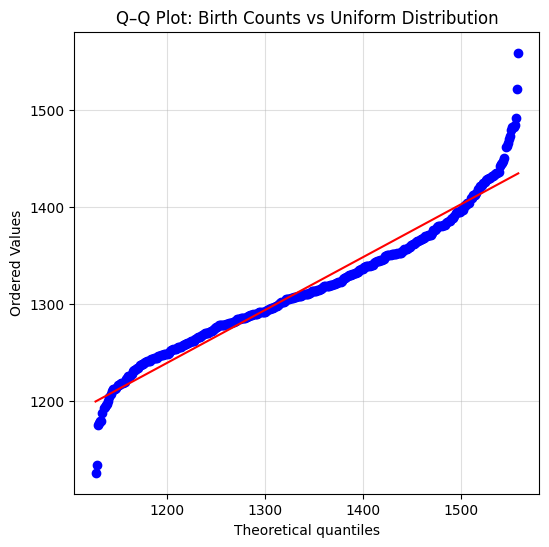

In [65]:
## Q-Q plot
import scipy.stats as stats

counts = bday["count"]
a, b = counts.min(), counts.max()
theoretical_uniform = stats.uniform(loc=a, scale=b-a)

plt.figure(figsize=(6,6))
stats.probplot(counts, dist=theoretical_uniform, plot=plt)
plt.title("Q–Q Plot: Birth Counts vs Uniform Distribution")
plt.grid(True, alpha=0.4)
plt.show()

## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [66]:
## Troubleshooting for these parts done with chat-gpt
## Chi-square test
import numpy as np
from scipy.stats import chi2

# Observed and expected counts
observed = bday["count"].values
expected = np.ones_like(observed) * observed.mean()

# Chi-square statistic
chi_stat = np.sum((observed - expected)**2 / expected)
df = len(observed) - 1
p_value_chi = 1 - chi2.cdf(chi_stat, df)

print(f"Chi-square statistic = {chi_stat:.2f}")
print(f"Degrees of freedom   = {df}")
print(f"P-value (Chi-square) = {p_value_chi:.10f}")


Chi-square statistic = 1352.72
Degrees of freedom   = 364
P-value (Chi-square) = 0.0000000000


From our chi-square test, we get a p-value of essentially 0, thus we reject the null hypothesis that the birthdays are uniformly distributed. Thus, from this chi-square test, there is significant evidence that birthdays are not uniformly distributed across the year.

In [67]:
## K-S test
from scipy.stats import kstest, uniform

a, b = observed.min(), observed.max()
print(a,b)
# Uniform distribution fitted to same range
ks_stat, p_value_ks = kstest(observed, 'uniform', args=(a, b - a))

print(f"Kolmogorov–Smirnov statistic = {ks_stat:.4f}")
print(f"P-value (K–S)                = {p_value_ks:.4f}")

1126 1559
Kolmogorov–Smirnov statistic = 0.2429
P-value (K–S)                = 0.0000


From our K-S test, we get a p-value of approcimately 0, meaning that we reject the nul hypothesis that out birthdays are unifromly distributed from of the interval [1126, 1559]. Thus, we can conclude that there is significant evidence that our birthday data does not follow a uniform distribution.

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


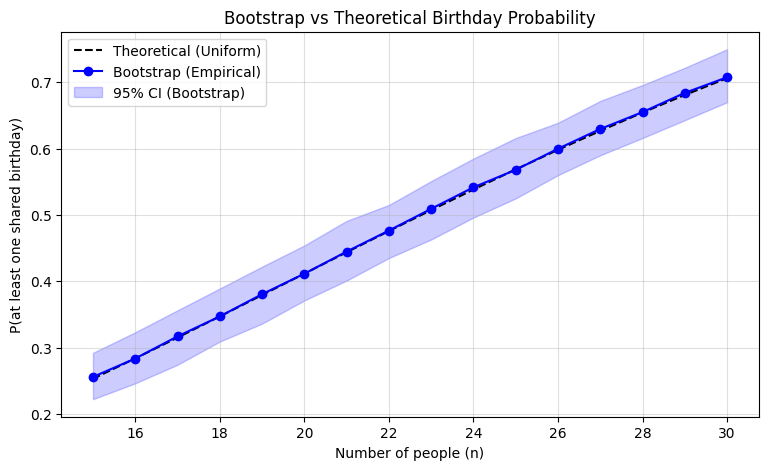

In [73]:
## Chatgpt assisted heavily in drafting and troubleshooting code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# --- Step 1. Load data ---
p_days = bday["count"].values / bday["count"].sum()
n_days = len(p_days)

# --- Step 2. Helper functions ---
def has_shared_birthday(n, p):
    birthdays = np.random.choice(np.arange(n_days), size=n, replace=True, p=p)
    return len(np.unique(birthdays)) < n

def bootstrap_shared_prob(n, p_days, B=300, sims_per_boot=500, alpha=0.05):
    """
    Nonparametric bootstrap estimate of P(shared birthday).
    Each bootstrap resample creates a new p* and estimates P(shared)
    by simulating many groups under p*.
    """
    boot_probs = []
    for _ in range(B):
        # Bootstrap resample of the 365-day empirical distribution
        p_star = np.random.choice(p_days, size=n_days, replace=True)
        p_star = p_star / p_star.sum()

        # Estimate P(shared) under this p*
        count_shared = sum(has_shared_birthday(n, p_star) for _ in range(sims_per_boot))
        boot_probs.append(count_shared / sims_per_boot)

    boot_probs = np.array(boot_probs)
    mean_est = np.mean(boot_probs)
    ci_lower = np.percentile(boot_probs, 2.5)
    ci_upper = np.percentile(boot_probs, 97.5)
    return mean_est, ci_lower, ci_upper

# --- Step 3. Run for n = 15 to 30 ---
n_values = np.arange(15, 31)
mean_estimates, lower_ci, upper_ci = [], [], []

for n in n_values:
    mean, lo, hi = bootstrap_shared_prob(n, p_days, B=300, sims_per_boot=500)
    mean_estimates.append(mean)
    lower_ci.append(lo)
    upper_ci.append(hi)

# --- Step 4. Theoretical uniform probabilities ---
def prob_no_shared_birthday(n, days_in_year=365):
    if n > days_in_year:
        return 0.0
    return math.prod([(days_in_year - i) / days_in_year for i in range(n)])

def prob_shared_birthday(n, days_in_year=365):
    return 1 - prob_no_shared_birthday(n, days_in_year)

uniform_probs = [prob_shared_birthday(n) for n in n_values]

# --- Step 5. Plot ---
plt.figure(figsize=(9,5))
plt.plot(n_values, uniform_probs, label="Theoretical (Uniform)", color="black", linestyle="--")
plt.plot(n_values, mean_estimates, label="Bootstrap (Empirical)", color="blue", marker='o')
plt.fill_between(n_values, lower_ci, upper_ci, color="blue", alpha=0.2, label="95% CI (Bootstrap)")
plt.xlabel("Number of people (n)")
plt.ylabel("P(at least one shared birthday)")
plt.title("Bootstrap vs Theoretical Birthday Probability")
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()


<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.
ChatGPT used to generate first draft code for this entire problem.

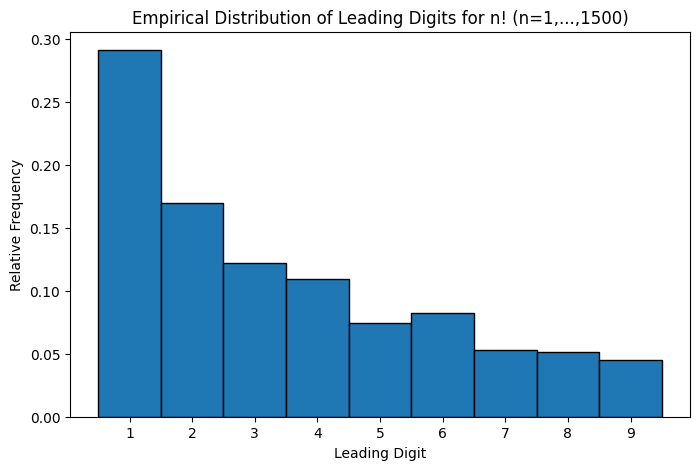

In [74]:
## Had chatGPT help me write my own
import numpy as np
import matplotlib.pyplot as plt
import math

# (a) Generate factorials and extract leading digits
n = 1500
first_digit = np.zeros(n)

for i in range(1, n + 1):
    # Compute log10 of factorial via sum of logs for numerical stability
    log_fact = np.sum(np.log10(np.arange(1, i + 1)))
    # Get fractional part
    frac_part = log_fact - math.floor(log_fact)
    # Leading digit = floor(10^(fractional part))
    first_digit[i - 1] = int(10 ** frac_part)

# Plot empirical histogram of first digits
plt.figure(figsize=(8, 5))
plt.hist(first_digit, bins=np.arange(0.5, 10.5, 1), density=True, edgecolor='black')
plt.xticks(range(1, 10))
plt.xlabel('Leading Digit')
plt.ylabel('Relative Frequency')
plt.title('Empirical Distribution of Leading Digits for n! (n=1,...,1500)')
plt.show()


<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [75]:
import numpy as np
from scipy.stats import chisquare

# If you already have `first_digit` from part (a), reuse it.
# Otherwise, quickly (re)compute from logs for n = 1500:
import math
n = 1500
first_digit = np.zeros(n, dtype=int)
log_fact = 0.0
for i in range(1, n+1):
    log_fact += math.log10(i)
    frac = log_fact - math.floor(log_fact)
    first_digit[i-1] = int(10**frac)

# Observed counts for digits 1..9
digits = np.arange(1, 10)
obs_counts = np.array([(first_digit == d).sum() for d in digits])

# Expected under uniform over {1,...,9}
exp_counts = np.full(9, n / 9.0)

# Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=obs_counts, f_exp=exp_counts)

print("Observed counts:", obs_counts)
print("Expected counts (uniform):", exp_counts)
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"Degrees of freedom: {len(digits)-1}")
print(f"P-value: {p_value:.4g}")

Observed counts: [437 255 183 164 112 124  80  77  68]
Expected counts (uniform): [166.66666667 166.66666667 166.66666667 166.66666667 166.66666667
 166.66666667 166.66666667 166.66666667 166.66666667]
Chi-square statistic: 667.512
Degrees of freedom: 8
P-value: 7.041e-139


As shown by the extremely small p-value, this is likely not uniform

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [76]:
import numpy as np
from scipy.stats import chisquare
import math

n = 1500
first_digit = np.zeros(n, dtype=int)
log_fact = 0.0

# Recompute leading digits for n! if not already done
for i in range(1, n + 1):
    log_fact += math.log10(i)
    frac = log_fact - math.floor(log_fact)
    first_digit[i - 1] = int(10 ** frac)

# Observed counts
digits = np.arange(1, 10)
obs_counts = np.array([(first_digit == d).sum() for d in digits])

# Benford’s probabilities: p(d) = log10(d+1) - log10(d)
benford_probs = np.log10(1 + 1 / digits)
exp_counts_benford = n * benford_probs

# Chi-square goodness-of-fit test
chi2_stat_benford, p_value_benford = chisquare(f_obs=obs_counts, f_exp=exp_counts_benford)

print("Observed counts:", obs_counts)
print("Expected counts (Benford):", np.round(exp_counts_benford, 2))
print("Chi-square statistic:", round(chi2_stat_benford, 3))
print("Degrees of freedom:", len(digits) - 1)
print("P-value:", p_value_benford)


Observed counts: [437 255 183 164 112 124  80  77  68]
Expected counts (Benford): [451.54 264.14 187.41 145.37 118.77 100.42  86.99  76.73  68.64]
Chi-square statistic: 9.768
Degrees of freedom: 8
P-value: 0.2816672796372305


Because we get a p-value greater than 0.05, a typical significance level, we fail to reject that the distribution is different from the benford's law distribution.

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

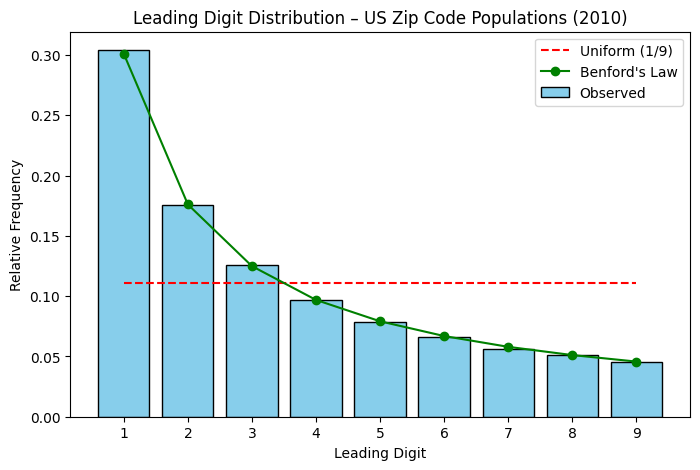

Observed counts: [30420 17560 12615  9702  7841  6594  5637  5088  4543]
Uniform Expected: [11111.11 11111.11 11111.11 11111.11 11111.11 11111.11 11111.11 11111.11
 11111.11]
Benford Expected: [30103.   17609.13 12493.87  9691.    7918.12  6694.68  5799.19  5115.25
  4575.75]

Uniform test: Chi2 = 50323.536, p = 0
Benford test: Chi2 = 11.843, p = 0.1583


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# --- Step 1: Load the data ---
# Make sure 'us_pop.csv' is in your working directory
# Assume it has one column of population numbers, possibly with a header
data = pd.read_csv("us_pop.csv")

# If the file has a named column (e.g. "Population"), adjust this line:
x = data.iloc[:, 0].dropna().to_numpy()

# --- Step 2: Extract the leading digit for each entry ---
def leading_digit(num):
    num = abs(num)
    if num == 0:
        return np.nan
    while num < 1:
        num *= 10
    return int(str(num)[0])

first_digit = np.array([leading_digit(val) for val in x if val > 0])

# --- Step 3: Empirical histogram ---
digits = np.arange(1, 10)
counts = np.array([(first_digit == d).sum() for d in digits])
proportions = counts / counts.sum()

plt.figure(figsize=(8, 5))
plt.bar(digits, proportions, color='skyblue', edgecolor='black', label='Observed')
plt.plot(digits, np.full(9, 1/9), 'r--', label='Uniform (1/9)')
plt.plot(digits, np.log10(1 + 1/digits), 'g-o', label="Benford's Law")
plt.xticks(digits)
plt.xlabel('Leading Digit')
plt.ylabel('Relative Frequency')
plt.title('Leading Digit Distribution – US Zip Code Populations (2010)')
plt.legend()
plt.show()

# --- Step 4: Chi-square tests ---
n = counts.sum()

# Uniform expected counts
exp_uniform = np.full(9, n / 9)
chi2_uniform, p_uniform = chisquare(f_obs=counts, f_exp=exp_uniform)

# Benford expected counts
benford_probs = np.log10(1 + 1 / digits)
exp_benford = n * benford_probs
chi2_benford, p_benford = chisquare(f_obs=counts, f_exp=exp_benford)

# --- Step 5: Print results ---
print("Observed counts:", counts)
print("Uniform Expected:", np.round(exp_uniform, 2))
print("Benford Expected:", np.round(exp_benford, 2))
print(f"\nUniform test: Chi2 = {chi2_uniform:.3f}, p = {p_uniform:.4g}")
print(f"Benford test: Chi2 = {chi2_benford:.3f}, p = {p_benford:.4g}")


# Citations:
ChatGPT and Gemini used to assist in coding as stated in the code chunks. ChatGPT used to convert handwritten work to latex compatible code.
